In [1]:
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
import keras
keras.__version__
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
df = pd.read_csv('./export_data/negative_direction/fillNA-mean/5-5/my_data_clean.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,process_name,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,...,4_2,4_3,4_4,a4,filename,height,hot_spot_nums,maxtmp,meantmp,tmp_integral
0,97,18.478268,29.377523,30.381542,24.582974,17.121124,24.635447,24.500401,24.188029,24.642875,...,24.604789,24.700000,17.596124,1.741966,20191205141649-2,180.8,0,30.1,24.7,0
1,98,8.569983,28.677213,28.844847,26.820977,8.551293,20.239664,24.731054,24.250235,24.539987,...,24.770131,24.700000,8.518029,2.012180,20191205141651-2,154.4,0,34.8,24.7,85
2,99,16.934404,25.300000,25.142694,21.729030,17.025045,21.715539,25.167267,25.228112,25.298036,...,31.283525,30.282150,18.793558,0.183852,20191205141653-2,121.5,1,30.9,25.3,14
3,100,3.576483,24.039302,28.068964,26.005633,6.694787,21.322800,24.731257,24.496585,24.387854,...,24.799968,23.103541,4.098558,2.299696,20191205141655-2,155.4,0,30.1,24.8,103
4,101,16.455826,20.890401,24.391891,24.961677,17.639127,24.772300,24.462992,24.350471,24.620136,...,24.642909,21.805469,17.428275,2.966194,20191205141657-2,148.3,0,28.5,24.7,0
5,102,3.544191,22.679577,25.100000,23.650756,5.819062,21.987737,25.100000,24.969998,24.842950,...,25.389769,23.431584,4.089433,-0.814723,20191205141659-2,141.2,1,29.6,25.1,463
6,103,8.167097,25.200000,25.200000,20.074552,8.360780,20.547291,24.902160,25.026094,25.200000,...,29.678991,28.456991,9.237758,0.435923,20191205141701-2,174.1,1,38.4,25.2,224
7,104,20.216045,29.928346,31.413032,24.607045,18.810963,25.712042,24.751303,24.537522,24.964577,...,24.895702,25.000000,19.291732,1.705961,20191205141703-2,178.1,0,29.5,25.0,451
8,105,3.919735,23.815177,25.199224,24.109341,6.417877,21.155617,25.200000,25.092029,25.363972,...,25.374666,24.090757,4.359545,-0.901580,20191205141705-2,150.3,1,29.2,25.2,823
9,106,11.554938,24.964509,24.664094,19.607787,11.696644,19.509675,24.920557,24.396992,24.477916,...,24.686298,24.700000,12.576938,-2.833010,20191205141707-2,156.6,1,35.9,24.7,199


In [4]:
useless_cols = ['0_0', '0_1','0_8','0_9', '1_0','1_9','8_0','8_9' ,
 '9_0','9_1','9_8', '9_9','a4','filename','process_name']
cols = list(set(df.columns)-set(useless_cols))
features = ['height','tmp_integral','hot_spot_nums','meantmp','maxtmp']#5个
target_cols = list(set(cols)-set(features))
data = df[cols]
data = data.sort_index(axis=1)
data.head()


,0_2,0_3,0_4,1_1,1_2,1_3,1_4,2_0,2_1,2_2,...,4_0,4_1,4_2,4_3,4_4,height,hot_spot_nums,maxtmp,meantmp,tmp_integral
0,30.381542,24.582974,17.121124,24.500401,24.188029,24.642875,24.700000,25.663555,24.439976,24.347475,...,17.102004,21.515725,24.604789,24.700000,17.596124,180.8,0,30.1,24.7,0
1,28.844847,26.820977,8.551293,24.731054,24.250235,24.539987,24.700000,25.013562,24.404375,24.401923,...,7.878313,19.784244,24.770131,24.700000,8.518029,154.4,0,34.8,24.7,85
2,25.142694,21.729030,17.025045,25.167267,25.228112,25.298036,25.300000,25.628195,25.090716,24.856563,...,17.610399,25.909492,31.283525,30.282150,18.793558,121.5,1,30.9,25.3,14
3,28.068964,26.005633,6.694787,24.731257,24.496585,24.387854,24.931452,24.963351,24.576181,24.512149,...,3.493609,21.311117,24.799968,23.103541,4.098558,155.4,0,30.1,24.8,103
4,24.391891,24.961677,17.639127,24.462992,24.350471,24.620136,23.971977,24.480732,24.518355,24.393846,...,16.470853,24.700000,24.642909,21.805469,17.428275,148.3,0,28.5,24.7,0


In [5]:
data.shape

(26147, 27)

In [23]:
float_data  = data.values 
# 'meantmp','maxtmp'

In [24]:
float_data = float_data[:,:-4]
float_data.shape

(26147, 23)

In [25]:
# #标准化
mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
index = (std == 0.0)
std[index] = 1
float_data /= std

In [26]:
# max_val = float_data.max(axis=0)
# min_val = float_data.min(axis=0)
# float_data = (float_data-min_val)/(max_val-min_val)

In [27]:
float_data

array([[ 4.60057827,  1.6601662 ,  1.22194823, ...,  1.57379981,
         1.24187606, -1.59598679],
       [ 3.68462557,  2.63909704, -0.25984227, ...,  1.57379981,
        -0.30404026, -1.70955573],
       [ 1.47794292,  0.41181453,  1.20533547, ...,  3.93774366,
         1.44578806, -1.85108673],
       ...,
       [-0.65196772,  0.39911648,  0.55559644, ..., -0.89454851,
         0.59405186,  1.573189  ],
       [-0.57408767,  0.39281977, -0.79790401, ..., -1.35663736,
        -0.72426808,  1.50737064],
       [-0.57408767,  0.38627593, -0.82155117, ..., -1.37578225,
        -0.76698924,  1.56501548]])

In [28]:
float_data.shape

(26147, 23)

In [37]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                          data.shape[-1]))
        targets = np.zeros((len(rows),22))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][:-1]
#             index_11 = (targets[j] >=30)
#             index_22 = (targets[j] <30)
#             targets[j][index_11] = 1
#             targets[j][index_22] = 0
        yield samples, targets

In [38]:
lookback = 30
step = 1
delay = 2
batch_size = 16

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=20000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=20000,
                    max_index=None,
                  shuffle=True,
                    step=step,
                    batch_size=batch_size)
# test_gen = generator(float_data,
#                      lookback=lookback,
#                      delay=delay,
#                        shuffle=False,

#                      min_index=22008,
#                      max_index=None,
#                      step=step,
#                      batch_size=batch_size)

train_steps = 20000//batch_size
# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (len(float_data) - 20000 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
# test_steps = (len(float_data) - 22008 - lookback) // batch_size

In [39]:
val_steps

382

In [70]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        print(samples.shape)
#         preds = samples[:, -1, :-1]
#         mae = np.mean(np.abs(preds - targets))
#         batch_maes.append(mae)
#     print(np.mean(batch_maes))
    
evaluate_naive_method()

(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)
(16, 30, 23)

In [43]:
np.mean(std[0]*0.2658410601766722)


0.4460018027905652

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,SGD,Adagrad

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0), loss='mse')
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_steps,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/10
258/258 [==============================] - 2s 8ms/step - loss: 0.5857 - val_loss: 0.1178
Epoch 2/10
258/258 [==============================] - 1s 5ms/step - loss: 0.3916 - val_loss: 0.1053
Epoch 3/10
258/258 [==============================] - 1s 5ms/step - loss: 0.3080 - val_loss: 0.1116
Epoch 4/10
258/258 [==============================] - 1s 5ms/step - loss: 0.2559 - val_loss: 0.1190
Epoch 5/10
258/258 [==============================] - 1s 5ms/step - loss: 0.2034 - val_loss: 0.1321
Epoch 6/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1861 - val_loss: 0.1277
Epoch 7/10
258/258 [==============================] - 1s 6ms/step - loss: 0.1643 - val_loss: 0.1403
Epoch 8/10
258/258 [==============================] - 2s 6ms/step - loss: 0.1420 - val_loss: 0.1320
Epoch 9/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1351 - val_loss: 0.1397
Epoch 10/10
258/258 [==============================] - 1s 5ms/step - loss: 0.1238 - val_loss: 0.1282

In [37]:
1.0375*std[0]

1.509446628972872

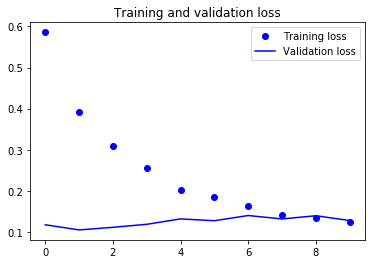

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam,Adagrad
from keras.layers import LSTM,Activation,Dense
from keras import metrics

model = Sequential()
# model.add(LSTM(64,return_sequences=True,input_shape=(None,float_data.shape[-1])))
# model.add(LSTM(16,activation='relu'))
# model.add(LSTM(32,return_sequences=True))
# model.add( Activation('linear') )

# model.add(Dense(88))

model.add(layers.GRU(256,return_sequences=True,activation='relu',input_shape=(None, float_data.shape[-1])))
# model.add(layers.GRU(64,activation='relu',return_sequences=True))
model.add(layers.GRU(128,return_sequences=True,dropout=0.2,activation='relu'))
model.add(layers.GRU(16,dropout=0.2,activation='relu'))


# # , activation='relu'
model.add(Dense(22))
# 、, metrics=[metrics.mae]
# model.compile(loss='mean_squared_error', optimizer=RMSprop())

model.compile(optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0), loss='mse')
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_steps,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/10
1250/1250 [==============================] - 123s 99ms/step - loss: 0.4332 - val_loss: 0.4453
Epoch 2/10
1250/1250 [==============================] - 142s 114ms/step - loss: 0.4081 - val_loss: 0.4318
Epoch 3/10
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3992 - val_loss: 0.4240
Epoch 4/10
1250/1250 [==============================] - 143s 114ms/step - loss: 0.3995 - val_loss: 0.4231
Epoch 5/10
1250/1250 [==============================] - 131s 105ms/step - loss: 0.3998 - val_loss: 0.4441
Epoch 6/10
1250/1250 [==============================] - 117s 94ms/step - loss: 0.4005 - val_loss: 0.4194
Epoch 7/10
1250/1250 [==============================] - 111s 89ms/step - loss: 0.3915 - val_loss: 0.4404
Epoch 8/10
1250/1250 [==============================] - 110s 88ms/step - loss: 0.3904 - val_loss: 0.4367
Epoch 9/10
1250/1250 [==============================] - 120s 96ms/step - loss: 0.4022 - val_loss: 0.4457
Epoch 10/10
1250/1250 [=============================

In [46]:
val_steps

382

In [65]:
def evaluate_naive_method1():
    batch_maes = []
    pred = []
    target = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
#         print(targets.shape)
#         break
        preds = model.predict(samples)
        pred.append(preds)
        target.append(targets)
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    return pred,target
pred,target = evaluate_naive_method1()
# evaluate_naive_method1()

0.4490155502477771


In [71]:
target[0].shape

(16, 22)

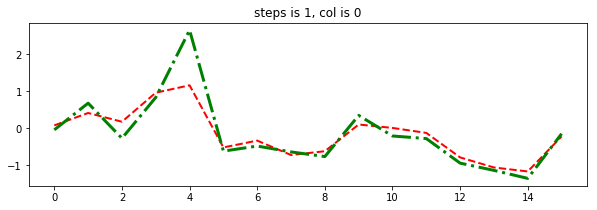

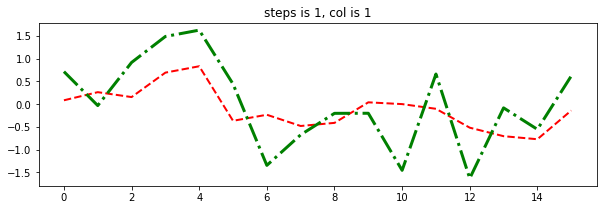

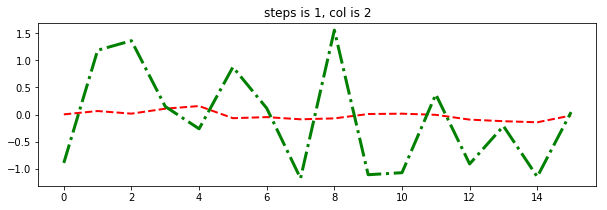

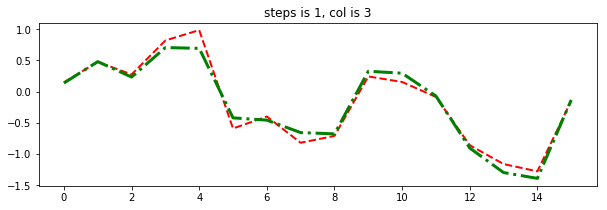

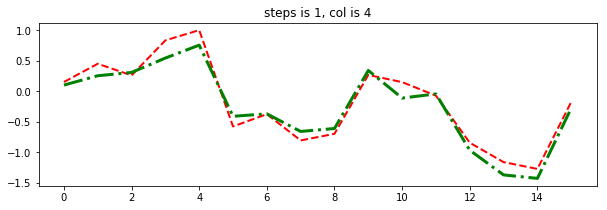

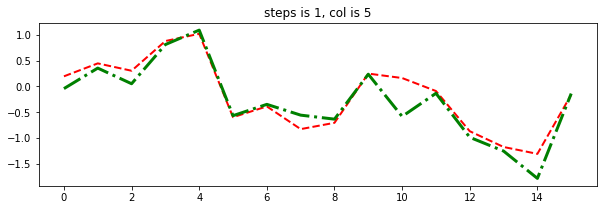

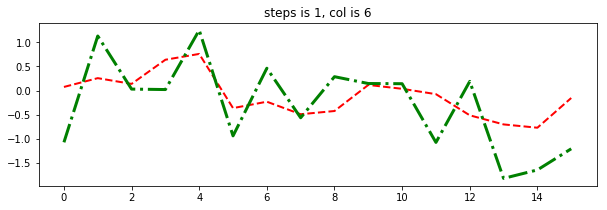

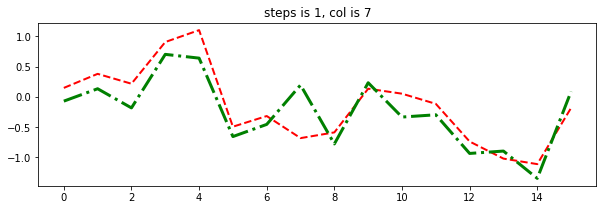

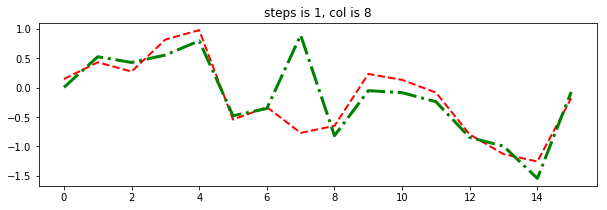

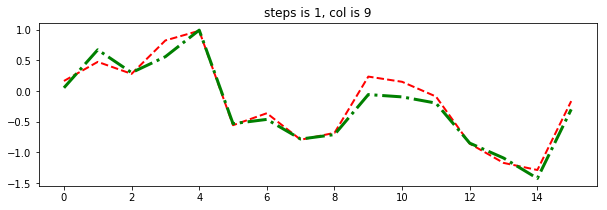

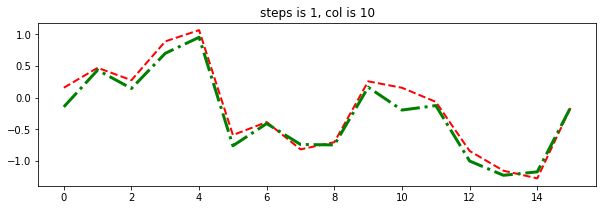

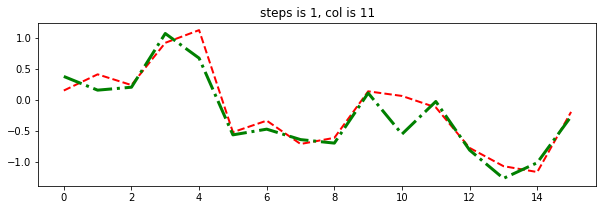

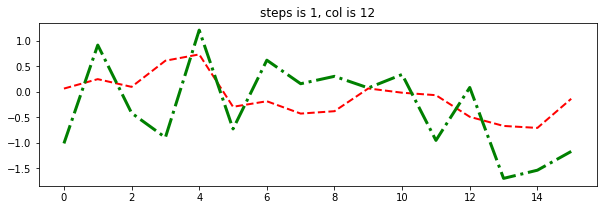

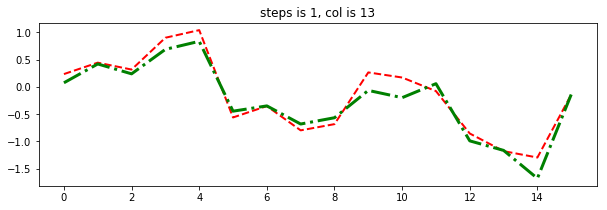

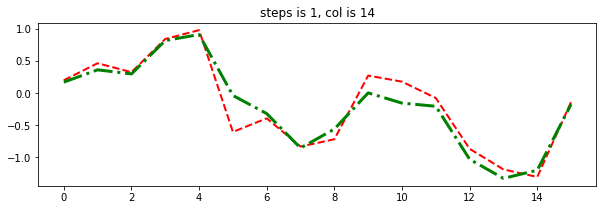

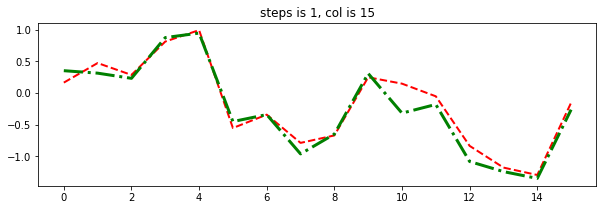

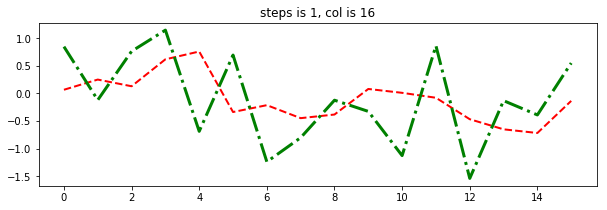

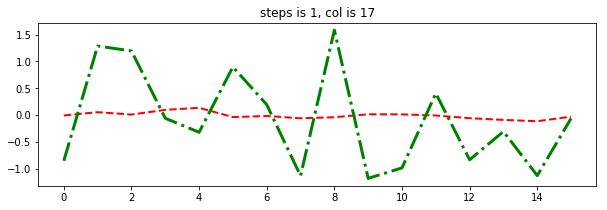

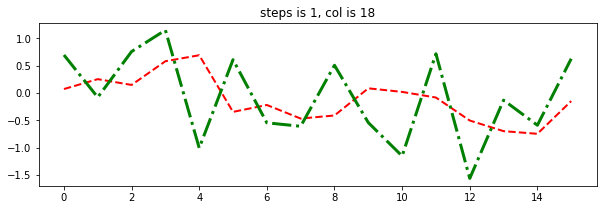

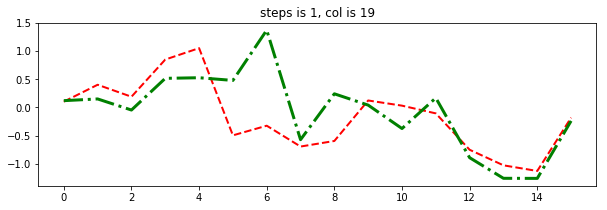

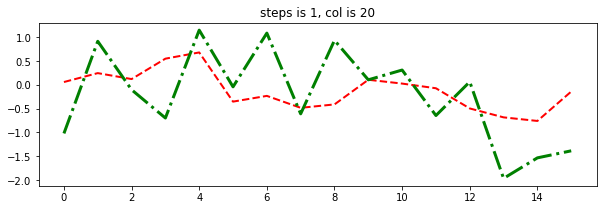

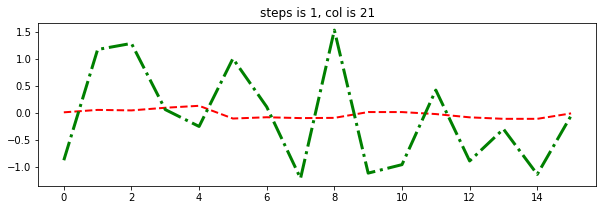

In [77]:
def plot_show1(steps):
    for k in range(target[0].shape[1]):
        ans = []
        ans_1 = []
        for i in pred[steps]:
            ans.append(i[k])
        for i in target[steps]:
            ans_1.append(i[k])
        plt.figure(figsize=(10,3))
        plt.plot(range(len(ans)),ans,color='red',linewidth=2.0,linestyle='--')
        plt.plot(range(len(ans_1)),ans_1,color='g',linewidth=3.0,linestyle='-.')
        plt.title('steps is '+str(steps)+', col is '+str(k))
        plt.show()
plot_show1(1)

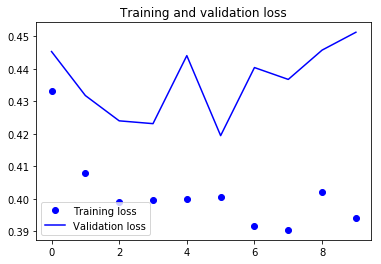

In [69]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()